# **Sentiment Analysis Using Deep learning**
#**With TFIDF**
# **Importing Libraries**

In [ ]:
pip install --upgrade tensorflow

In [ ]:
pip install --upgrade keras

In [ ]:
import pandas as pd
import numpy as np
import string
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Loading Dataset**

In [ ]:
df = pd.read_csv(r"/content/Twitter_Data.csv")

In [ ]:
df.shape

(162980, 2)

In [ ]:
df.head(5)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
df['clean_text'] = df['clean_text'].astype('str')

In [ ]:
df.isnull().sum()

clean_text    0
category      7
dtype: int64

In [ ]:
df = df.dropna()

# **Data Cleaning**

In [ ]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
stopwords_english = stopwords.words('english')
# Removing Stopwords
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_english)]))
# removing punctuations
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
df['clean_text'][0]

'modi promised minimum government maximum governance expected begin difficult job reforming state take years get justice state business exit psus temples'

# **Data Visualization**

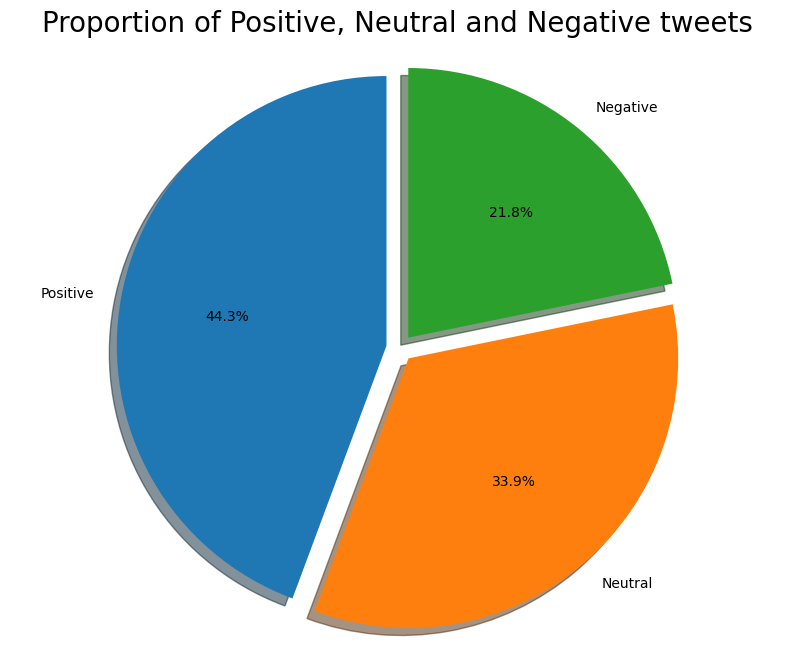

In [ ]:
labels = ['Positive', 'Neutral', 'Negative']
sizes = [df.category[df['category']==1].count(), df.category[df['category']==0].count(),df.category[df['category']==-1].count()]
explode = (0.05, 0.05, 0.05)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Positive, Neutral and Negative tweets", size = 20)
plt.show()

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
positive_wc = wc.generate(df[df['category'] == 1.0]['clean_text'].str.cat(sep = " "))
neutral_wc = wc.generate(df[df['category'] == 0.0]['clean_text'].str.cat(sep = " "))
negative_wc = wc.generate(df[df['category'] == -1.0]['clean_text'].str.cat(sep = " "))

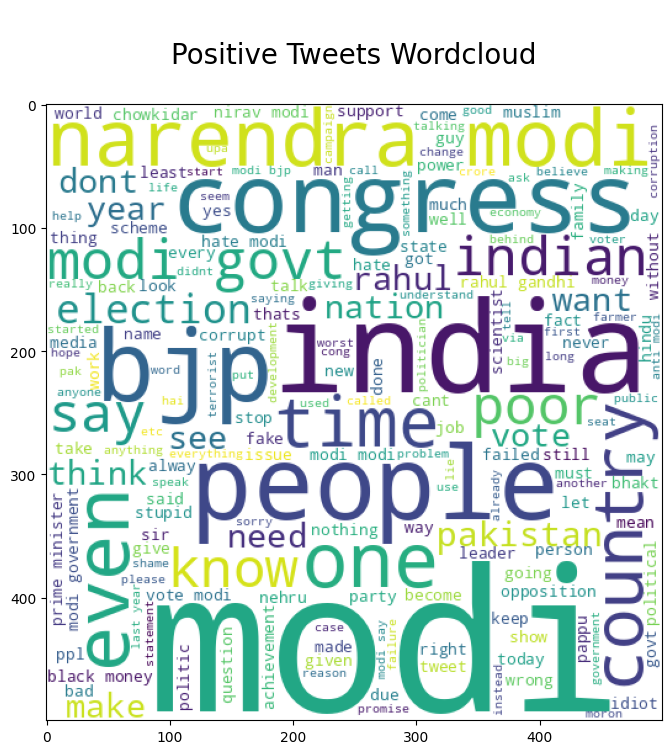

In [ ]:
plt.figure(figsize = (8, 8))
plt.title("\nPositive Tweets Wordcloud\n", size = 20)
plt.imshow(positive_wc)

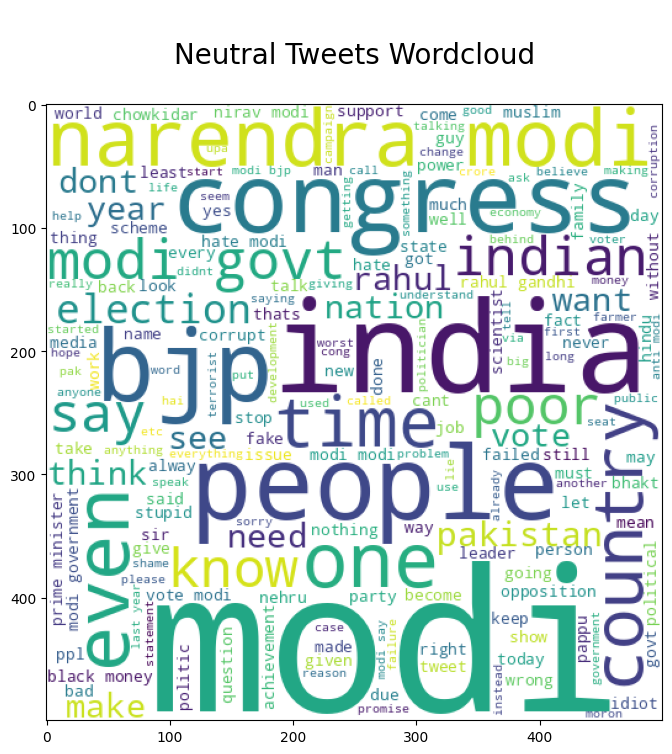

In [ ]:
plt.figure(figsize = (8, 8))
plt.title("\nNeutral Tweets Wordcloud\n", size = 20)
plt.imshow(neutral_wc)

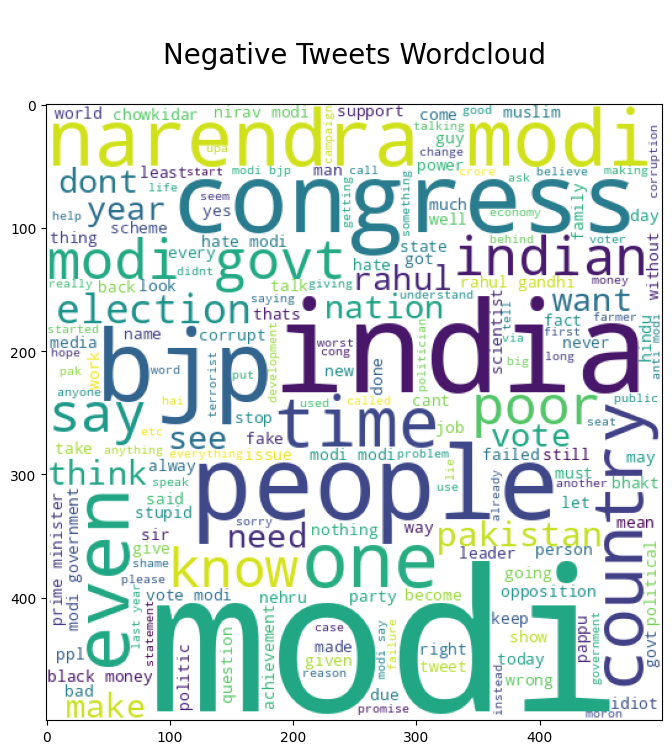

In [ ]:
plt.figure(figsize = (8, 8))
plt.title("\nNegative Tweets Wordcloud\n", size = 20)
plt.imshow(negative_wc)

# **Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['clean_text'] = df['clean_text'].apply(lemmatize_text)

In [ ]:
df['category'] = [2 if x == -1 else x for x in df['category']]

In [ ]:
df.category.value_counts()

category
1.0    72250
0.0    55213
2.0    35510
Name: count, dtype: int64

In [ ]:
df.head(5)

,clean_text,category
0,modi promised minimum government maximum gover...,2.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporter prefix chowkidar name modi gr...,1.0
4,answer among powerful world leader today trump...,1.0


In [ ]:
X = df['clean_text']
y = df['category']

# **Splitting Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# **TF-IDF vectorization**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# **Sequential Data Modelling**

In [ ]:
model = tf.keras.Sequential()

# Input layer
model.add(Input(shape=(X_train_tfidf.shape[1],)))

# Embedding layer
model.add(Embedding(input_dim=500, output_dim=64))

# LSTM layer
model.add(LSTM(64, activation='tanh'))

# Fully connected layer
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(3, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 64)             │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,379 (271.01 KB)

 Trainable params: 69,379 (271.01 KB)

 Non-trainable params: 0 (0.00 B)

# **Now Adding Optimizer, Loss Function and training the model**

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train_dense, y_train, epochs=2, batch_size=512, verbose=1,shuffle=True,validation_data=(X_test_dense,y_test))

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4462 - loss: 1.0612

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


255/255 ━━━━━━━━━━━━━━━━━━━━ 616s 2s/step - accuracy: 0.4462 - loss: 1.0612 - val_accuracy: 0.4415 - val_loss: 1.0607
Epoch 2/2
255/255 ━━━━━━━━━━━━━━━━━━━━ 683s 3s/step - accuracy: 0.4405 - loss: 1.0619 - val_accuracy: 0.4415 - val_loss: 1.0606


# **Accuracy and Loss of Test data**

In [ ]:
predictions = model.predict(X_test_dense)
print(history.history)

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 74s 73ms/step
{'accuracy': [0.4437711834907532, 0.44378653168678284], 'loss': [1.0606318712234497, 1.0597188472747803], 'val_accuracy': [0.44147875905036926, 0.44147875905036926], 'val_loss': [1.0607036352157593, 1.0606251955032349]}


# **Model Evaluation**

In [ ]:
print("Evaluating on test data")
results = model.evaluate(X_test_dense, y_test, batch_size=128)

print("test loss: ", results[0])
print("Model's Accuracy on Test Data: ",results[1])

Evaluating on test data
255/255 ━━━━━━━━━━━━━━━━━━━━ 77s 300ms/step - accuracy: 0.4465 - loss: 1.0577
test loss:  1.0606248378753662
Model's Accuracy on Test Data:  0.44147875905036926


Accuracy on Test Data Comes out to be: 44.14 %